# Results of VAE-Kernel-DM approach

In [1]:
# Load data
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from dm_class import dmMethod

In [2]:
solar_forcing = Dataset("data/Solar_forcing_1st_mill.nc", "r")  # 999 x 1 x 1
T2m_r1 = Dataset("data/T2m_R1_ym_1stMill.nc", "r")  # 999 x 192 x 96
T2m_r2 = Dataset("data/T2m_R2_ym_1stMill.nc", "r")  # 999 x 192 x 96
Volc = Dataset("data/Volc_Forc_AOD_1st_mill.nc", "r")  # 999 x 1 x 1,,

# Numpy version
T2m_r1_np = np.asarray(T2m_r1.variables["T2m"][:])
T2m_r2_np = np.asarray(T2m_r1.variables["T2m"][:])
volc_activity_np = Volc.variables["AOD"][:].flatten()
solar_forcing_np = solar_forcing.variables["TSI"][:].flatten()

# Solar long cycle 
solar_forcing_sm = savgol_filter(solar_forcing_np, 19, 3)

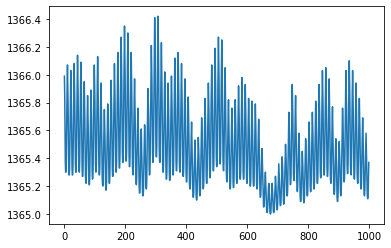

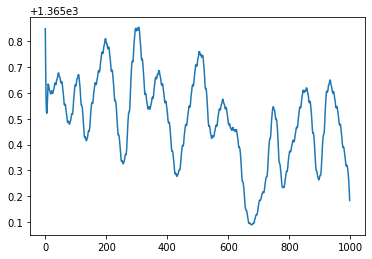

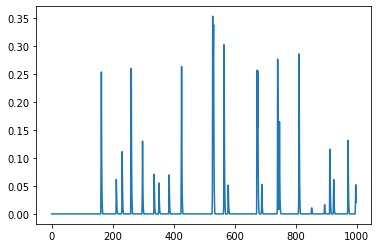

In [3]:
# Plot the ground-truth
plt.plot(solar_forcing_np[:])
plt.show()
plt.plot(solar_forcing_sm[:])
plt.show()
plt.plot(volc_activity_np[:])
plt.show()

In [51]:
def plot_results(file, n_comps, return_model = None):
    # import the results of AE
    ae_output = np.load("data/outputs_32.npy").reshape(900, -1)
    
    # Perform DM (we are interested in 2 components)
    dm = dmMethod(ae_output, n_components=n_comps)
    print("OUTPUTING RESULTS OF PCA")
    dm.perform_pca()
    if return_model == "pca":
        model = dm
        
    # Make some comparsions
    for i in range(n_comps):
        plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
        plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
        plt.show()
        print("correlation between volcanic activity and component {} at time lag = 0 is {}".format(i, 
            np.corrcoef(volc_activity_np[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
        print("correlation between volcanic activity and component {} at time lag = 1 is {}".format(i, 
            np.corrcoef(volc_activity_np[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    

OUTPUTING RESULTS OF PCA


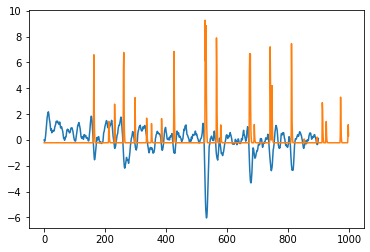

correlation between volcanic activity and component 0 at time lag = 0 is -0.4658456664888313
correlation between volcanic activity and component 0 at time lag = 1 is -0.3963341627763753


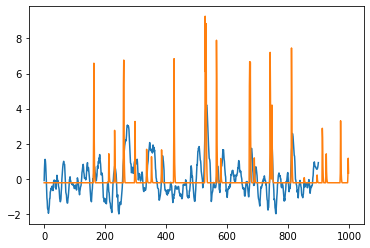

correlation between volcanic activity and component 1 at time lag = 0 is 0.26608738682713384
correlation between volcanic activity and component 1 at time lag = 1 is 0.21491989650149362


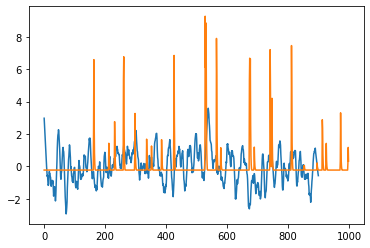

correlation between volcanic activity and component 2 at time lag = 0 is 0.01718889807761708
correlation between volcanic activity and component 2 at time lag = 1 is -0.001056856984657838


In [52]:
plot_results("data/outputs_32.npy", 3)

In [17]:
# import the results of AE
ae_32 = np.load("data/outputs_32.npy").reshape(900, -1)
# Perform DM (we are interested in 2 components)
dm = dmMethod(ae_32, n_components=3)
dm.perform_pca()

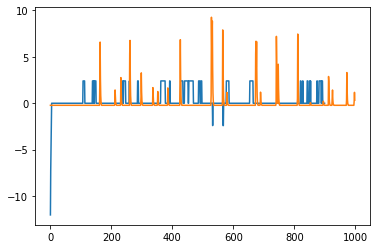

-0.0772204666507722
-0.05150883726302867


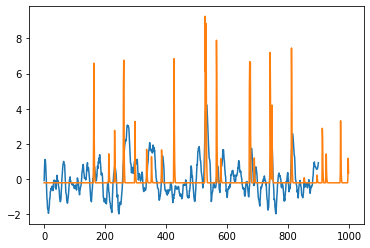

0.2666990064170204
0.21548895722438288


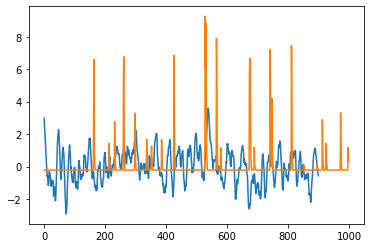

0.01706094776368394
-0.0011717613593938245


In [4]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
    plt.show()
    print(np.corrcoef(volc_activity_np[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1])
    print(np.corrcoef(volc_activity_np[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1])

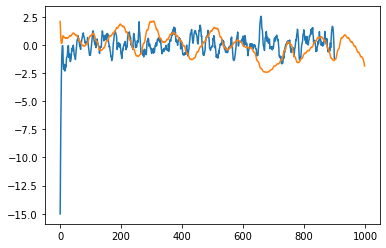

correlation between solar radiation and component 0 at time lag = 0 is -0.17329730730975704
correlation between solar radiation and component 0 at time lag = 1 is -0.15078836029780607
correlation between solar radiation and component 0 at time lag = 2 is -0.1370608916674545


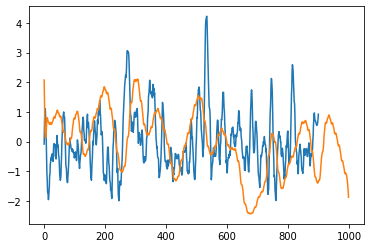

correlation between solar radiation and component 1 at time lag = 0 is 0.0845738263687524
correlation between solar radiation and component 1 at time lag = 1 is 0.08985518062372597
correlation between solar radiation and component 1 at time lag = 2 is 0.09584168960027878


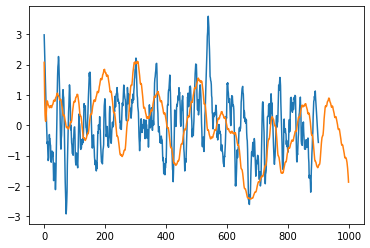

correlation between solar radiation and component 2 at time lag = 0 is 0.1521238763168971
correlation between solar radiation and component 2 at time lag = 1 is 0.14839671743508956
correlation between solar radiation and component 2 at time lag = 2 is 0.14709133563100638


In [35]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
    plt.show()
    print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 1 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 2 is {}". format(i, 
      np.corrcoef(solar_forcing_sm[2:902], savgol_filter(dm.components[i, :], 19, 3))[0,1]))


In [4]:
dm.perfrom_varimax()

Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 1.00 of variance
	 Varimax rotation
	 Further metrics


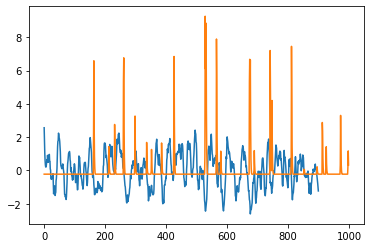

-0.20414946764541017
-0.17746860467452907


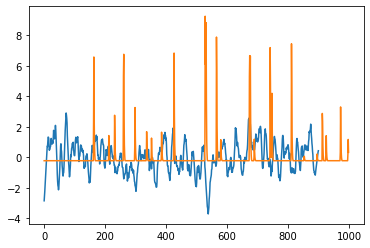

-0.04769268619152808
-0.024146556103821867


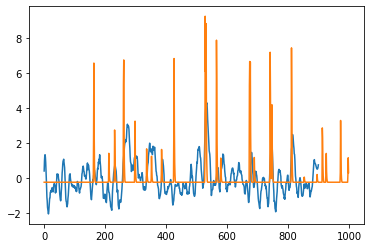

0.25359387475575645
0.20233480053855302


In [7]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
    plt.show()
    print(np.corrcoef(volc_activity_np[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1])
    print(np.corrcoef(volc_activity_np[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1])

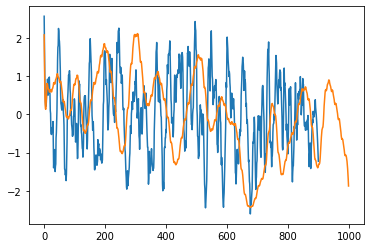

correlation between solar radiation and component 0 at time lag = 0 is 0.05782953906634918
correlation between solar radiation and component 0 at time lag = 1 is 0.05036464927927133
correlation between solar radiation and component 0 at time lag = 2 is 0.044342422252125153


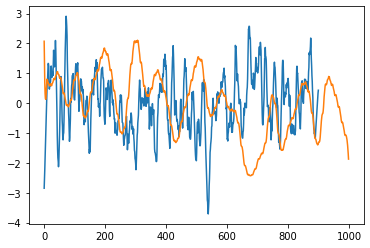

correlation between solar radiation and component 1 at time lag = 0 is -0.1559845277753827
correlation between solar radiation and component 1 at time lag = 1 is -0.15304214617775494
correlation between solar radiation and component 1 at time lag = 2 is -0.15250913082120968


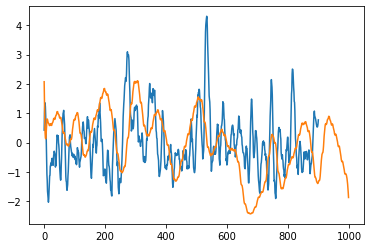

correlation between solar radiation and component 2 at time lag = 0 is 0.10573042769286314
correlation between solar radiation and component 2 at time lag = 1 is 0.1100796654183502
correlation between solar radiation and component 2 at time lag = 2 is 0.1155034344978689


In [5]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
    plt.show()
    print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 1 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 2 is {}". format(i, 
      np.corrcoef(solar_forcing_sm[2:902], savgol_filter(dm.components[i, :], 19, 3))[0,1]))

In [20]:
dm.perform_fastICA()
dm.components = dm.components.transpose()

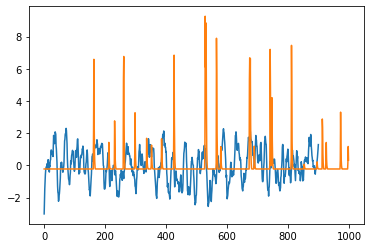

0.06382522579088529
0.061067445979596145


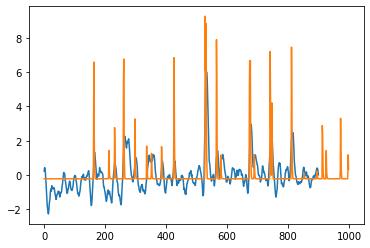

0.4445660499795804
0.3750848305723239


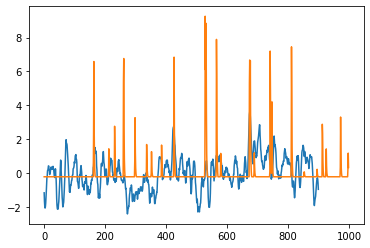

0.17075869883009984
0.16509097635098677


In [10]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
    plt.show()
    print(np.corrcoef(volc_activity_np[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1])
    print(np.corrcoef(volc_activity_np[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1])

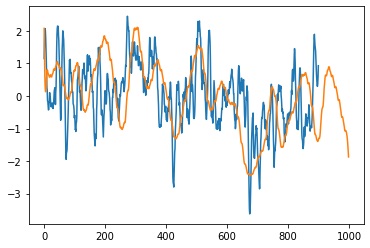

correlation between solar radiation and component 0 at time lag = 0 is 0.4190812997509144
correlation between solar radiation and component 0 at time lag = 1 is 0.4181018337179661
correlation between solar radiation and component 0 at time lag = 2 is 0.41810165783598635


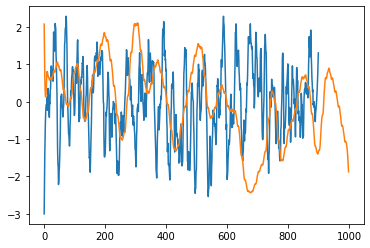

correlation between solar radiation and component 1 at time lag = 0 is -0.01900508903692378
correlation between solar radiation and component 1 at time lag = 1 is -0.012703061053582168
correlation between solar radiation and component 1 at time lag = 2 is -0.00846170902929723


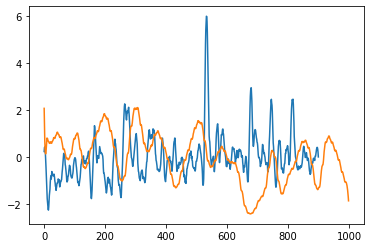

correlation between solar radiation and component 2 at time lag = 0 is -0.17943869705636045
correlation between solar radiation and component 2 at time lag = 1 is -0.174311281078709
correlation between solar radiation and component 2 at time lag = 2 is -0.1681602712943505


In [22]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
    plt.show()
    print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 1 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 2 is {}". format(i, 
      np.corrcoef(solar_forcing_sm[2:902], savgol_filter(dm.components[i, :], 19, 3))[0,1]))

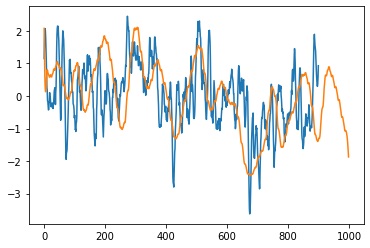

correlation between solar radiation and component 0 at time lag = 0 is 0.41908129975091424


In [33]:
i = 0
plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
plt.show()
print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
      np.corrcoef(solar_forcing_sm[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))

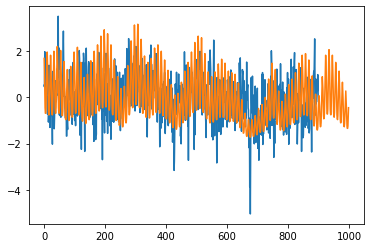

correlation between solar radiation and component 0 at time lag = 0 is 0.06737287682816032


In [38]:
i = 0
plt.plot(dmMethod.standardize_data(dm.components[i, :]))
plt.plot(dmMethod.standardize_data(solar_forcing_np[:]))
plt.show()
print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
      np.corrcoef(solar_forcing_np[:900], dm.components[i, :])[0,1]))

In [42]:
# import the results of AE
ae_32 = np.load("data/outputs_diff_32.npy").reshape(900, -1)
# Perform DM (we are interested in 2 components)
dm = dmMethod(ae_32, n_components=3)
dm.perform_pca()

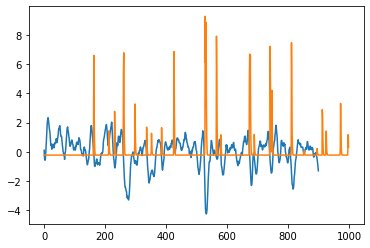

-0.28289076852471595
-0.22467150707684166


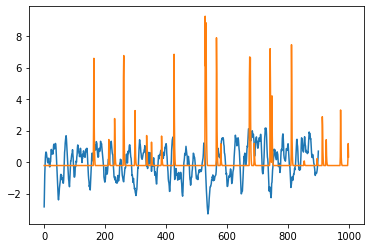

-0.07972148337924816
-0.05999576144660173


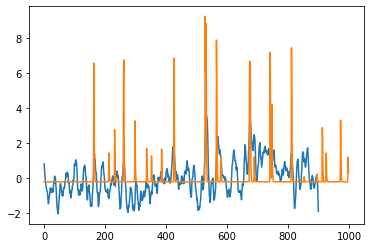

0.33323891796659044
0.29693276415663183


In [43]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
    plt.show()
    print(np.corrcoef(volc_activity_np[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1])
    print(np.corrcoef(volc_activity_np[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1])

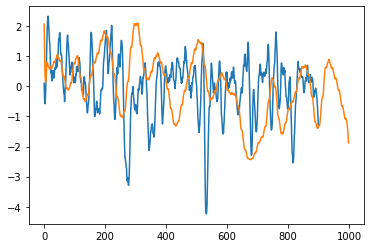

correlation between solar radiation and component 0 at time lag = 0 is 0.04066083474847226
correlation between solar radiation and component 0 at time lag = 1 is 0.03360734160991622
correlation between solar radiation and component 0 at time lag = 2 is 0.025846920149230727


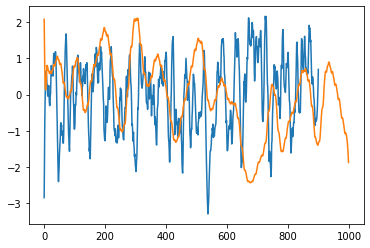

correlation between solar radiation and component 1 at time lag = 0 is -0.1601686254282306
correlation between solar radiation and component 1 at time lag = 1 is -0.15632330521533216
correlation between solar radiation and component 1 at time lag = 2 is -0.1535238791583599


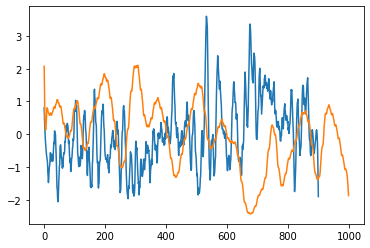

correlation between solar radiation and component 2 at time lag = 0 is -0.44425828995803457
correlation between solar radiation and component 2 at time lag = 1 is -0.4454313799442061
correlation between solar radiation and component 2 at time lag = 2 is -0.4452677490266107


In [44]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
    plt.show()
    print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 1 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 2 is {}". format(i, 
      np.corrcoef(solar_forcing_sm[2:902], savgol_filter(dm.components[i, :], 19, 3))[0,1]))


Get Varimax components
	 Get SVD
	 User-selected number of components: 3
	 Explaining 0.32 of variance
	 Varimax rotation
	 Further metrics


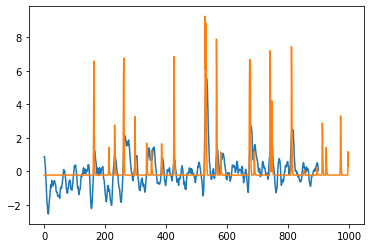

0.40679414576739426
0.33735110417120007


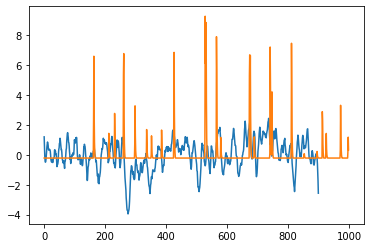

0.07587966003555874
0.085460642832295


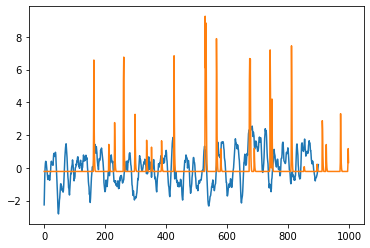

0.07105372397735593
0.06927010021593355


In [45]:
dm.perfrom_varimax()
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
    plt.show()
    print(np.corrcoef(volc_activity_np[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1])
    print(np.corrcoef(volc_activity_np[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1])

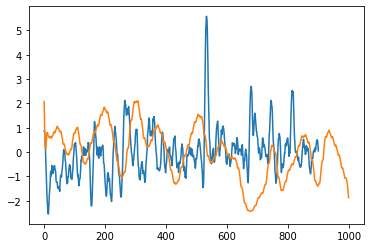

correlation between solar radiation and component 0 at time lag = 0 is -0.20636894895760138
correlation between solar radiation and component 0 at time lag = 1 is -0.2018459490761877
correlation between solar radiation and component 0 at time lag = 2 is -0.19589531103501243


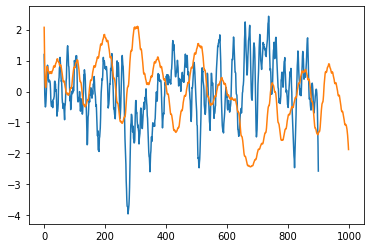

correlation between solar radiation and component 1 at time lag = 0 is -0.29821663468024934
correlation between solar radiation and component 1 at time lag = 1 is -0.3048781260690986
correlation between solar radiation and component 1 at time lag = 2 is -0.3108046536408428


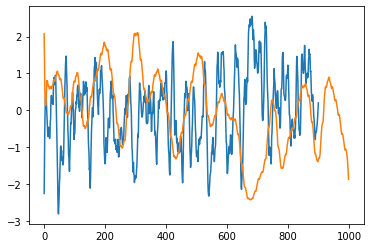

correlation between solar radiation and component 2 at time lag = 0 is -0.28269166241304833
correlation between solar radiation and component 2 at time lag = 1 is -0.27872180910737504
correlation between solar radiation and component 2 at time lag = 2 is -0.2751617443673243


In [46]:
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
    plt.show()
    print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 1 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 2 is {}". format(i, 
      np.corrcoef(solar_forcing_sm[2:902], savgol_filter(dm.components[i, :], 19, 3))[0,1]))

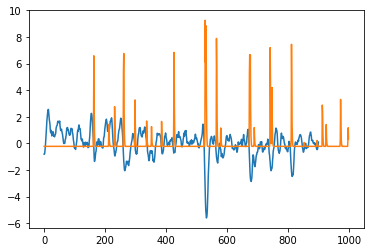

-0.4166026866673149
-0.3476115556662217


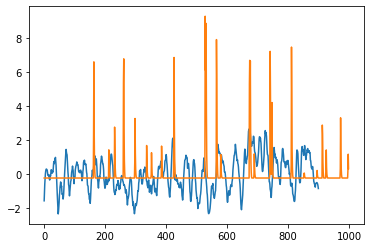

0.04489974147448841
0.05474326332905059


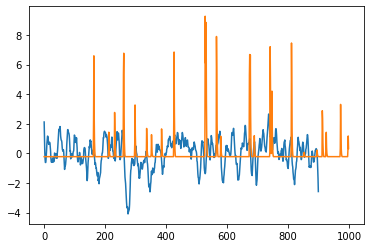

0.02316660106211708
0.03642545701756404


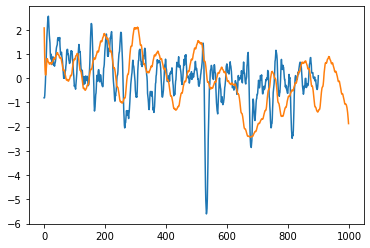

correlation between solar radiation and component 0 at time lag = 0 is 0.2440981637169827
correlation between solar radiation and component 0 at time lag = 1 is 0.23974515516133468
correlation between solar radiation and component 0 at time lag = 2 is 0.23394255444101894


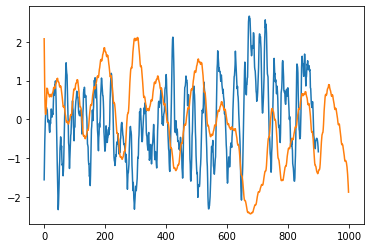

correlation between solar radiation and component 1 at time lag = 0 is -0.3327187969265378
correlation between solar radiation and component 1 at time lag = 1 is -0.33242725481324853
correlation between solar radiation and component 1 at time lag = 2 is -0.33235615515348566


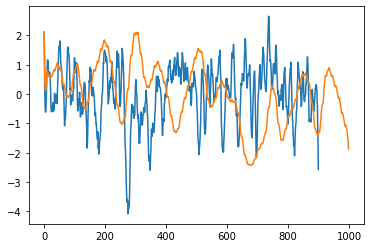

correlation between solar radiation and component 2 at time lag = 0 is -0.1537407223076932
correlation between solar radiation and component 2 at time lag = 1 is -0.16215104969919328
correlation between solar radiation and component 2 at time lag = 2 is -0.16973464524874815


In [48]:
dm.perform_fastICA()
dm.components = dm.components.transpose()
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(volc_activity_np[:]))
    plt.show()
    print(np.corrcoef(volc_activity_np[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1])
    print(np.corrcoef(volc_activity_np[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1])
    
# Make some comparsions
for i in range(3):
    plt.plot(dmMethod.standardize_data(savgol_filter(dm.components[i, :], 19, 3)))
    plt.plot(dmMethod.standardize_data(solar_forcing_sm[:]))
    plt.show()
    print("correlation between solar radiation and component {} at time lag = 0 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[:900], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 1 is {}". format(i, 
          np.corrcoef(solar_forcing_sm[1:901], savgol_filter(dm.components[i, :], 19, 3))[0,1]))
    print("correlation between solar radiation and component {} at time lag = 2 is {}". format(i, 
      np.corrcoef(solar_forcing_sm[2:902], savgol_filter(dm.components[i, :], 19, 3))[0,1]))